In [15]:
# import libraries
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib import pyplot as pl
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [28]:
# read in data
df_orig = pd.read_excel("~/desktop/FinProject/Analysis/IPO_Data.xlsx")
# drop duplicates
df_orig = df_orig.drop_duplicates()

# df without data that have search volume availability and original high/low filing prices
df = df_orig[df_orig['search_avail'] == 0]
df = df.drop(columns=['search_avail', 'search_vol_avg'])
df = df.drop(columns=['original_high_filing_price', 'original_low_filing_price', 'upward_adjustment'])

In [17]:
df.shape
df.describe()

,proceeds_amt_mil,offer_price,primary_shares_offered,secondary_shares_offered,venture_backed,num_bookrunners,rank_no_leads,num_lead_colead_managers,closing_price,c1,...,positive,uncertainty,litigious,strongmodal,weakmodal,constraining,internet,nasdaq_returns,vix_returns,underpricing
count,2234.000000,2234.000000,2.234000e+03,2.234000e+03,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,...,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2230.000000,2234.000000
mean,141.101388,13.986775,6.952407e+06,1.474254e+06,0.462847,1.423903,1.555506,4.059087,19.278493,1.108608,...,0.005038,0.025476,0.003349,0.023323,0.007443,0.007394,0.160698,0.002347,0.007248,0.303777
std,343.329053,5.719232,1.246495e+07,7.425217e+06,0.498729,0.947234,1.028396,2.681161,16.916974,1.041981,...,0.007074,0.013109,0.005599,0.015133,0.006830,0.006821,0.367335,0.034554,0.111330,0.608996
min,3.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,3.937500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.148758,-0.317406,-0.432692
25%,38.500000,10.000000,2.940122e+06,0.000000e+00,0.000000,1.000000,1.000000,3.000000,10.945625,0.000000,...,0.000000,0.016393,0.000000,0.014019,0.000000,0.000000,0.000000,-0.016760,-0.065854,0.004325
50%,66.750000,13.500000,4.480000e+06,0.000000e+00,0.000000,1.000000,1.000000,4.000000,15.305000,0.995025,...,0.000000,0.024390,0.000000,0.021277,0.006897,0.006849,0.000000,0.003197,-0.000462,0.115748
75%,123.000000,17.000000,6.698250e+06,4.037500e+05,1.000000,2.000000,2.000000,4.750000,21.856250,1.679499,...,0.008065,0.033548,0.005714,0.030000,0.011165,0.011905,0.000000,0.022581,0.063733,0.316901
max,7322.400000,97.000000,2.362060e+08,2.000000e+08,1.000000,10.000000,10.000000,34.000000,280.000000,7.476636,...,0.044444,0.090909,0.083333,0.250000,0.062500,0.050000,1.000000,0.189781,0.699396,6.975000


In [18]:
# normalize continuous variables using min-max feature scaling
df_numeric = pd.DataFrame(df, columns=df._get_numeric_data().columns)
x = df_numeric.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_numeric_norm = pd.DataFrame(x_scaled, columns=df_numeric.columns)

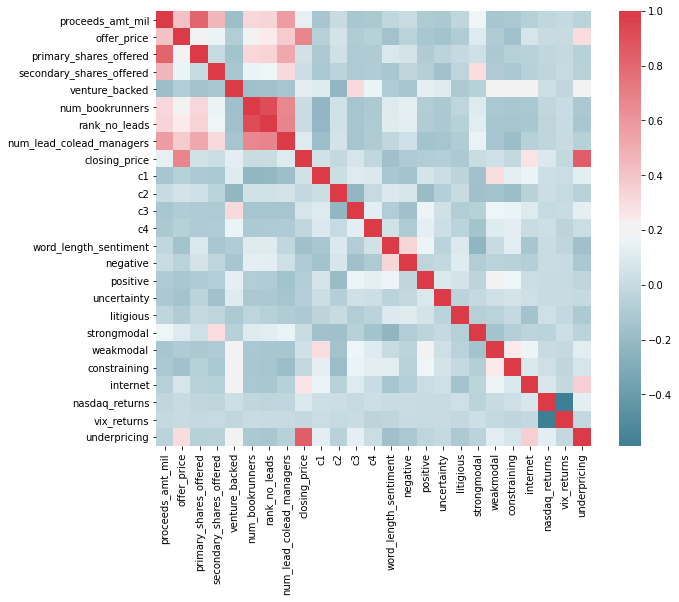

In [97]:
# correlation matrix
f, ax = pl.subplots(figsize=(10, 8))
corr = df_numeric_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Correlation Matrix

proceeds_amt, secondary_shares_offered

underpricing, internet: 0.4

In [20]:
# get rid of NA values
df_numeric_norm.isnull().sum().sum()
df_numeric_norm = df_numeric_norm.dropna()
df_numeric_norm = df_numeric_norm.reset_index(drop=True)

In [29]:
# log-transform predictors and response variable
# df = df_numeric_norm.copy()
df = df.dropna()
df = df.reset_index(drop=True)
for column in df.columns:
    try:
        df[column] = np.log(df[column])
        print("column worked", column)
    except:
        print("column not numeric",column)
        pass

column not numeric filing_date
column not numeric issue_date
column not numeric issuer
column not numeric gross_spread_dollar
column not numeric gross_spread_pct
column worked proceeds_amt_mil
column worked offer_price
column not numeric primary_exchange
column worked primary_shares_offered
column worked secondary_shares_offered
column worked venture_backed
column worked num_bookrunners
column worked rank_no_leads
column worked num_lead_colead_managers
column worked closing_price
column worked c1
column worked c2
column worked c3
column worked c4
column worked word_length_sentiment
column worked negative
column worked positive
column worked uncertainty
column worked litigious
column worked strongmodal
column worked weakmodal
column worked constraining
column worked internet
column worked nasdaq_returns
column worked vix_returns
column worked underpricing


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
df

,filing_date,issue_date,issuer,gross_spread_dollar,gross_spread_pct,proceeds_amt_mil,offer_price,primary_exchange,primary_shares_offered,secondary_shares_offered,...,positive,uncertainty,litigious,strongmodal,weakmodal,constraining,internet,nasdaq_returns,vix_returns,underpricing
0,7/28/92,6/26/98,Cumulus Media Inc,0.98,7,4.428433,2.639057,Nasdaq,15.437822,13.734073,...,-inf,-3.164068,-inf,-4.262680,-inf,-4.262680,-inf,-3.005033,NaN,-inf
1,11/9/94,2/20/97,Brylane Inc,1.68,7,4.564348,3.178054,New York,15.201805,-inf,...,-inf,-4.574711,-4.574711,-inf,-inf,-inf,-inf,NaN,-2.177147,-inf
2,1/26/95,8/10/98,Pilot Network Services,0.98,7,3.642836,2.639057,Nasdaq,14.773947,11.673214,...,-inf,-3.410676,-5.356586,-4.257974,-5.356586,-5.356586,0.0,NaN,-2.238480,NaN
3,6/8/95,6/9/99,Skechers USA Inc,0.77,7,4.107590,2.397895,New York,15.525698,-inf,...,-inf,-3.845883,-inf,-5.455321,-inf,-inf,-inf,-3.331420,NaN,NaN
4,9/15/95,1/28/97,Administaff Inc,1.19,7,3.931826,2.833213,New York,14.914123,-inf,...,-4.131159,-3.320228,-5.517453,-4.418841,-4.824306,-inf,-inf,NaN,-1.804758,-1.223775
5,5/17/96,2/18/97,VDI Media,0.49,7,2.975530,1.945910,Nasdaq,14.771022,12.206073,...,-inf,-4.579852,-5.273000,-3.886705,-inf,-4.174387,-inf,-3.659507,NaN,-2.926739
6,5/21/96,5/2/97,DTM Corp,0.56,7,3.190476,2.079442,Nasdaq,14.863598,12.137842,...,-inf,-3.654978,-4.753590,-3.367296,-inf,-4.060443,-inf,-2.533024,NaN,-inf
7,7/8/96,5/13/97,ASD Group Inc,0.575,10,1.686399,1.749200,Sm Cap Mkt,13.758940,-inf,...,-4.473542,-2.933097,-4.879007,-3.780395,-5.572154,-4.185860,-inf,-5.525837,NaN,-inf
8,7/12/96,3/4/97,Aviation Distributors Inc,0.45,9,1.791759,1.609438,Sm Cap Mkt,13.997832,-inf,...,-inf,-3.898600,-3.898600,-3.610918,-4.997212,-inf,-inf,NaN,-3.441019,-3.688879
9,8/2/96,2/5/97,Digital Lightwave Inc,0.84,7,4.010963,2.484907,Nasdaq,15.112662,13.754847,...,-3.834061,-3.834061,-inf,-3.834061,-4.121744,-5.220356,-inf,NaN,-3.193496,-2.772589


In [6]:
df_numeric_norm.shape

(2230, 25)

In [7]:
# extract attributes and label y
X = df_numeric_norm.iloc[:, :-1]
y = df_numeric_norm.iloc[:, -1]
# linear regression Algorithm training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
coeff_df

,Coefficient
closing_price,1.638854
nasdaq_returns,0.020959
proceeds_amt_mil,0.014545
internet,0.013425
vix_returns,0.010354
c1,0.008306
rank_no_leads,0.007681
positive,0.004543
venture_backed,0.003115
num_lead_colead_managers,0.000567


In [8]:
print("linear model intercept=", regressor.intercept_) # intercept
print("R^2=", regressor.score(X, y)) # R^2 value

linear model intercept= 0.0652302387459163
R^2= 0.8494241090157


In [9]:
# predictions
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head()

,Actual,Predicted
135,0.072875,0.075081
648,0.059014,0.068620
39,0.099948,0.093127
1379,0.067817,0.075029
353,0.063099,0.069891


In [10]:
# Evaluating algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01660662747697736
Mean Squared Error: 0.0019066834893892869
Root Mean Squared Error: 0.043665587015283405


In [11]:
# summary statistics
# code from https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           underpricing   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     540.8
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:06:59   Log-Likelihood:                 4557.6
No. Observations:                2230   AIC:                            -9065.
Df Residuals:                    2205   BIC:                            -8922.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Summary Statistics

*none of the sentiment categories and categories of company intentions are significant

*internet, venture-backed are significant

Text(0, 0.5, 'Residuals')

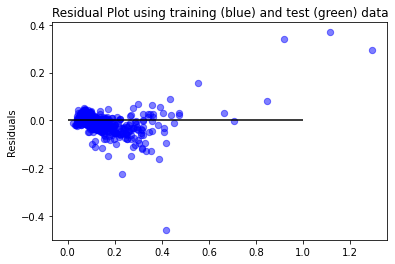

In [13]:
# Residual plot
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
# plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=1)
plt.title("Residual Plot using training (blue) and test (green) data")
plt.ylabel("Residuals")

In [32]:
# extract attributes and label y
df = pd.DataFrame(df, columns=df._get_numeric_data().columns)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# linear regression Algorithm training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
coeff_df

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').